**Υλοποίηση 1: Κυρτό περίβλημα.**

1) Αυξητικός αλγόριθμος.

In [60]:
import numpy as np

def orientation(p1,p2,p3):
  if((p2[0]*p3[1])-(p2[1]*p3[0])-(p1[0]*p3[1])+(p1[1]*p3[0])+(p1[0]*p2[1])-(p1[1]*p2[0])) < 0:    #right orientation
    return True
  return False

def incremental(P):
  P.sort()                                                                                  #sort set by x
  Lup = [P[0],P[1]]                                                                         #initialize L upper
  for i in range(2,len(P)):
    Lup.append(P[i])
    while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):   #lup has more than 2 elements and the 3 last points are not clockwise oriented
      Lup.pop(len(Lup)-2)                                                                     #remove 2nd from end point
  Llow  = [P[len(P)-1],P[len(P)-2]]                                                             #initialize L lower
  for i in range(len(P)-3,-1,-1):
    Llow.append(P[i])
    while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):   #llow has more than 2 elements and the 3 last points are not clockwise oriented
      Llow.pop(len(Llow)-2)                                                                   #remove 2nd from end point
  Llow.pop(0)                                                                                   #remove first and last point from llow
  Llow.pop(len(Llow)-1)
  L = Lup + Llow
  return np.array(L)

Αλγόριθμος Περιτυλίγματος.

In [61]:
def collinear(p1,p2,p3):
  if((p3[1] - p2[1])*(p2[0] - p1[0]) == (p2[1] - p1[1])*(p3[0] - p2[0])):
    return True
  return False


def giftwrapping(S):
  S = sorted(S, key=lambda k: [k[0],k[1]])        #sort S with the smallest x
  r0 = S[0]                                       #initialize r0
  r = r0                                          #initialize current r
  P = []                                          #chain of points
  while True:
    P.append(r)                                   #current point in chain
    u = S[0]                                      #begin with r0 point as u
    for j in range(1,len(S)):
      t = S[j]                                      #point t in S
      if(orientation(r,u,t) or collinear(r,u,t)):   #check cw orientation and collinearity
        u = t
    if(u == r0):                                    #end point is the starting point
      break
    r = u
    S.remove(r)                                    #remove visisted point r
  return np.array(P)

Αλγόριθμος Διαίρει και Βασίλευε.

In [62]:
import math

def divideConquer(P):
  P.sort()                            #sort by x
  if(len(P) <= 2):                    #very few points
    return P
  alen = math.ceil(len(P)/2)
  blen = math.floor(len(P)/2)
  a = P[0:alen]                       #divide into 2 subsets
  b = P[alen:len(P)]
  ahull = divideConquer(a)            #find convex hull of the 2 subsets recursively
  bhull = divideConquer(b)
  return merge(ahull,bhull)           #merge convex hulls

def merge(ahull, bhull):
  rightmosta = max(ahull)             #find rightmost point of a
  leftmostb = min(bhull)              #find leftmost point of b
  uppera, upperb, lowera, lowerb = intersection(ahull, bhull, rightmosta, leftmostb)
  mergedch = []                       #merged polygon
  ai = uppera
  mergedch.append(ahull[uppera])      #begin with upper point of hull A
  while ai!=lowera:                   #append all the points between upper and lower point of A - counterclockwise orientation
    ai = (ai + 1)%len(ahull)          #attention to limits
    mergedch.append(ahull[ai])

  bj = lowerb
  mergedch.append(bhull[lowerb])      #connect the half of convex hull A with the lowest point of B
  while bj!=upperb:                   #append all the points between lower and upper point of B - counterclockwise orientation
    bj = (bj + 1)%len(bhull)          #attention to limits
    mergedch.append(bhull[bj])

  return mergedch



def intersection(ahull, bhull, rightmosta, leftmostb):
  ai = ahull.index(rightmosta)        #find Ai
  bj = bhull.index(leftmostb)         #find Bj

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    ai2 = (ai1 + 1) % len(ahull)                    #Ai+1 - attention not getting out of limits
    while(orientation(ahull[ai1],ahull[ai2],bhull[bj1]) and not collinear(ahull[ai1],ahull[ai2],bhull[bj1])):     #clockwise Ai Ai+1 Bj - case for collinearity
      ai1 = (ai1 + 1) % len(ahull)              #increase i
      ai2 = (ai1 + 1) % len(ahull)
      flag = 1                                    #i changed

    bj2 = (bj1 - 1 + len(bhull))%len(bhull)        #Bj-1
    while(orientation(bhull[bj2],bhull[bj1],ahull[ai1]) and not collinear(bhull[bj2],bhull[bj1],ahull[ai1])):     #clockwise Bj-1 Bj Ai case for collinearity
      bj1 = (bj1 - 1 + len(bhull))%len(bhull)
      bj2 = (bj1 - 1 + len(bhull))%len(bhull)
      flag = 1                                    #j changed

  uppera = ai1                          #upper bridge AiBj
  upperb = bj1

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    bj2 = (bj1 + 1) % len(bhull)                    #Bi+1 - attention not getting out of limits
    while(orientation(bhull[bj1],bhull[bj2],ahull[ai1]) and not collinear(bhull[bj1],bhull[bj2],ahull[ai1])):     #clockwise Bj Bj+1 Ai
      bj1 = (bj1 + 1) % len(bhull)              #increase j
      bj2 = (bj1 + 1) % len(bhull)
      flag = 1                                    #j changed

    ai2 = (ai1 - 1 + len(ahull))%len(ahull)        #Aj-1
    while(orientation(ahull[ai2],ahull[ai1],bhull[bj1]) and not collinear(ahull[ai2],ahull[ai1],bhull[bj1])):     #clockwise Ai-1 Ai Bj
      ai1 = (ai1 - 1 + len(ahull))%len(ahull)
      ai2 = (ai1 - 1 + len(ahull))%len(ahull)
      flag = 1                                    #i changed

  lowera = ai1                          #lower bridge AiBj
  lowerb = bj1

  return uppera, upperb, lowera, lowerb

Αλγόριθμος QuickHull.

In [63]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def quickhull(P):
  return ConvexHull(P)

3) QuickHull σε 3 διαστάσεις.

In [64]:
def quickhull3d(P):
  return ConvexHull(P)

**Εφαρμογή 1:**

1) Ορίζουμε 80 τυχαία σημεία στο επίπεδο:

In [73]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(80)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[ 93.40599235  44.75963845]
 [  1.60033087 109.50333535]
 [100.14639201  72.011199  ]
 [129.80827981 111.16746403]
 [ 79.1950607  107.14871854]
 [ 92.61933771 150.52474944]
 [163.92301496 124.34771461]
 [123.37682537 178.58055769]
 [141.62068989   2.91022126]
 [ 10.28071591 153.02608774]
 [165.86891756 113.05136726]
 [ 75.04769469 128.80319858]
 [ 15.95336388 123.65403885]
 [118.06329288  79.86304456]
 [ 78.90083998   2.02647016]
 [198.3959237  193.88266181]
 [177.48961428 145.88631316]
 [129.1416666  199.81755074]
 [148.77777344 100.6209449 ]
 [103.84645318  29.78470432]
 [135.84890816  38.86746757]
 [ 49.90643685 189.62607044]
 [ 97.00017115  99.03746713]
 [ 97.89451735  58.99063153]
 [ 46.63720939  55.62472324]
 [132.24274747  46.10918445]
 [172.78257499 127.04886829]
 [100.80202185 135.5651003 ]
 [ 11.00370561 101.07470963]
 [173.35996692  62.30339878]
 [ 43.20490855 168.98760565]
 [ 54.85917509  22.48999738]
 [ 86.92510891  93.01173989]
 [ 51.28578976 167.09589022

α) Αυξητικός αλγόριθμος.

Points of convex hull:
[[  1.60033087 109.50333535]
 [  1.85127098 113.20168498]
 [  8.66943882 187.40433619]
 [ 16.30033785 194.04496729]
 [129.1416666  199.81755074]
 [188.54628724 196.42594407]
 [198.3959237  193.88266181]
 [199.63127343  16.20647443]
 [188.24364245   7.26026373]
 [172.90274525   2.81316746]
 [ 78.90083998   2.02647016]
 [ 19.80247924  31.1923735 ]
 [  5.50563456  50.78216294]]


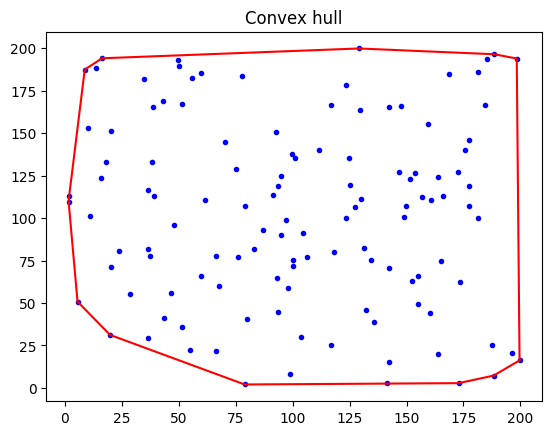

In [74]:
import matplotlib.pyplot as plt

def plot2D(Par,L):
  plt.figure()
  x = Par[:,0]        #x coordinate for P
  y = Par[:,1]        #y coordinate for P
  plt.plot(x,y,'.b')  #plot all the points
  x = L[:,0]
  y = L[:,1]
  plt.plot(x,y,'r-')      #plot points of convex hull using coordinates x and y   
  xlast = [L[len(x)-1,0],L[0,0]]
  ylast = [L[len(x)-1,1],L[0,1]]
  plt.plot(xlast, ylast, 'r-')    #plot last vertex
  plt.title("Convex hull") 
  plt.show()



L = incremental(P)
print("Points of convex hull:")
print(L)
plot2D(Par,L)

Αλγόριθμος περιτυλίγματος.

Points of convex hull:
[[  1.60033087 109.50333535]
 [  5.50563456  50.78216294]
 [ 19.80247924  31.1923735 ]
 [ 78.90083998   2.02647016]
 [172.90274525   2.81316746]
 [188.24364245   7.26026373]
 [199.63127343  16.20647443]
 [198.3959237  193.88266181]
 [188.54628724 196.42594407]
 [129.1416666  199.81755074]
 [ 16.30033785 194.04496729]
 [  8.66943882 187.40433619]
 [  1.85127098 113.20168498]]


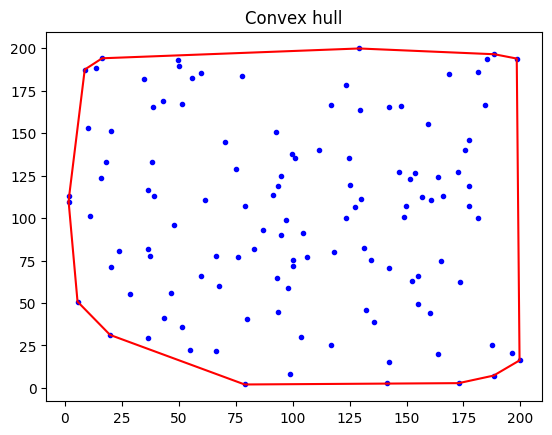

In [75]:
L = giftwrapping(P)
print("Points of convex hull:")
print(L)
plot2D(Par,L)

Αλγόριθμος Διαίρει και Βασίλευε.

Points of convex hull:
[[ 16.30033785 194.04496729]
 [  8.66943882 187.40433619]
 [  1.85127098 113.20168498]
 [  1.60033087 109.50333535]
 [  5.50563456  50.78216294]
 [ 19.80247924  31.1923735 ]
 [ 78.90083998   2.02647016]
 [172.90274525   2.81316746]
 [188.24364245   7.26026373]
 [199.63127343  16.20647443]
 [198.3959237  193.88266181]
 [188.54628724 196.42594407]
 [129.1416666  199.81755074]]


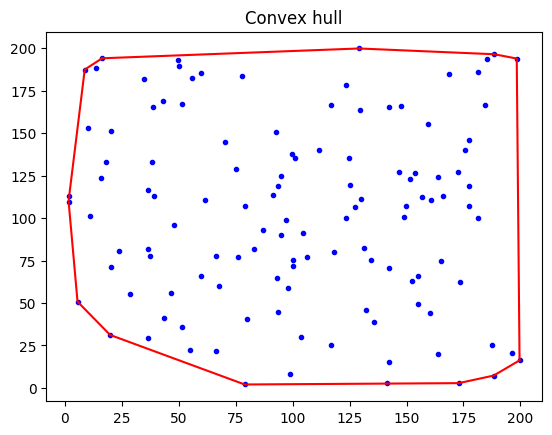

In [76]:
L = divideConquer(P)
print("Points of convex hull:")
print(np.array(L))
plot2D(Par,np.array(L))

Αλγόριθμος Quickhull (2D).

Points of convex hull:
[[ 91.23645065 113.56347797]
 [141.62068989   2.91022126]
 [129.80827981 111.16746403]
 [  1.60033087 109.50333535]
 [ 93.40599235  44.75963845]
 [100.14639201  72.011199  ]
 [165.86891756 113.05136726]
 [151.6393254  122.93897665]
 [147.36186222 165.9540232 ]
 [106.47710791  77.33204174]
 [116.94249758  25.42361423]
 [ 36.6425253   29.31042715]
 [ 23.75020077  80.51071142]]


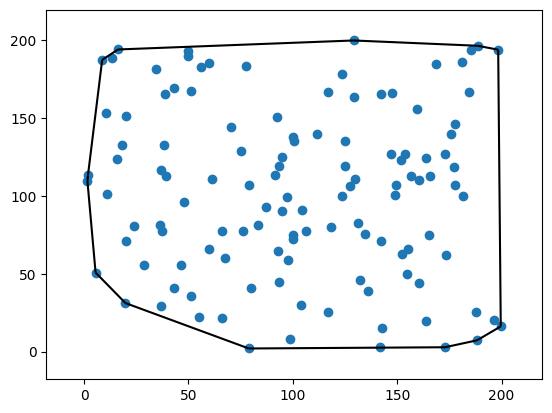

In [77]:
L = quickhull(P)
print("Points of convex hull:")
print(Par[L.vertices])
_ = convex_hull_plot_2d(L)
plt.show()

β) Επιλέγουμε τον αυξητικό αλγόριθμο για την οπτικοποίηση των βημάτων του.

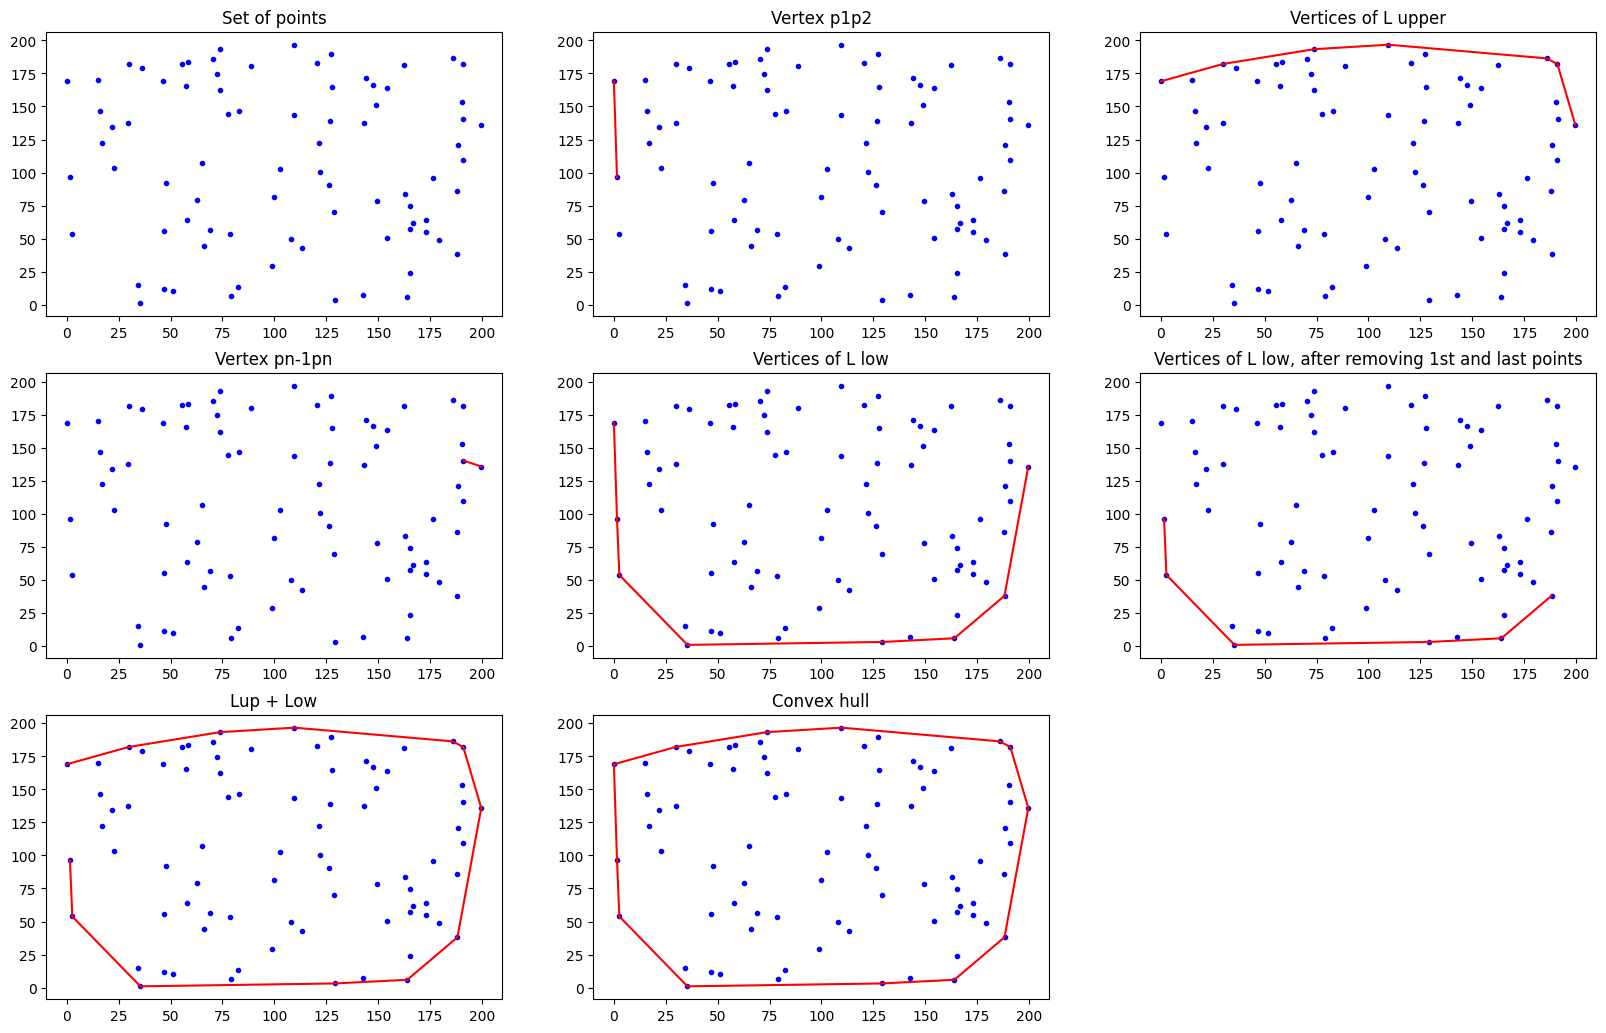

In [70]:
P.sort()
fig = plt.figure(figsize=(20,17))
ax = fig.add_subplot(431)
Par = np.array(P)
plt.plot(Par[:,0],Par[:,1],'.b')
plt.title("Set of points")

ax = fig.add_subplot(432)                                                                              
Lup = [P[0],P[1]]  
Lupar = np.array((list(P[0]),list(P[1])))
plt.plot(Par[:,0],Par[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')        #plotting p1 and p2 
plt.title("Vertex p1p2")

for i in range(2,len(P)):
  Lup.append(P[i])
  while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):   
    Lup.pop(len(Lup)-2)  

ax = fig.add_subplot(433)
j = 0
Lupar = [list(Lup[j]) for j in range(len(Lup))]
Lupar = np.array(Lupar)
plt.plot(Par[:,0],Par[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')        
plt.title("Vertices of L upper")
  

ax = fig.add_subplot(434)                                                                              
Llow  = [P[len(P)-1],P[len(P)-2]]
Llowar = np.array((list(P[len(P)-1]),list(P[len(P)-2])))
plt.plot(Par[:,0],Par[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')        #plotting pn and pn-1 
plt.title("Vertex pn-1pn")     
                                                                                                                 
for i in range(len(P)-3,-1,-1):
  Llow.append(P[i])
  while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):   
    Llow.pop(len(Llow)-2)   

ax = fig.add_subplot(435)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Par[:,0],Par[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')       
plt.title("Vertices of L low")
                                                                
Llow.pop(0)                                                                                   
Llow.pop(len(Llow)-1)     

ax = fig.add_subplot(436)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Par[:,0],Par[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')       
plt.title("Vertices of L low, after removing 1st and last points")

L = Lup + Llow

ax = fig.add_subplot(437)
j = 0
Lar = [list(L[j]) for j in range(len(L))]
Lar = np.array(Lar)
plt.plot(Par[:,0],Par[:,1],'.b')
plt.plot(Lar[:,0],Lar[:,1],'r-')       
plt.title("Lup + Low")


ax = fig.add_subplot(438)
plt.plot(Par[:,0],Par[:,1],'.b')
x = Lar[:,0]
y = Lar[:,1]
plt.plot(x,y,'r-')        
xlast = [Lar[len(x)-1,0],Lar[0,0]]
ylast = [Lar[len(x)-1,1],Lar[0,1]]
plt.plot(xlast, ylast, 'r-')    #plot last vertex
plt.title("Convex hull") 
plt.show()

3) Θεωρούμε 50 τυχαία σημεία στις 3 διαστάσεις:

In [71]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(50)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[160.02460953  92.53208337 156.31365879]
 [107.6846296  167.69033645 110.38698754]
 [177.43005176  47.49746609  67.69469995]
 [ 41.48854146 153.4520929  187.09384121]
 [ 36.66182169   7.68240795 151.80745517]
 [119.80422919 193.47242272 129.27751066]
 [154.30876016 197.76982639   8.31336756]
 [147.03213478 172.65484109  84.1228081 ]
 [177.48821289  55.15085368  61.86290769]
 [ 32.33692434  41.03001225  17.97330332]
 [ 87.1543838   73.46911929  13.90837923]
 [170.81791173 172.65339988 144.66262447]
 [ 11.46145843 186.70071488 190.94492474]
 [  5.52786247  68.02021885 151.02708498]
 [ 85.37754578 158.24299481  78.61381653]
 [ 79.72500723  94.1483076   20.68263664]
 [ 96.45361795 168.56368564 103.44278797]
 [126.04824775  10.47788525  74.03694521]
 [100.26663157  88.01506964  54.47003955]
 [ 90.12711104  38.07682169   6.72787987]
 [ 74.35948303  77.64682161   6.85417807]
 [ 48.15054079 159.30174188 152.62397012]
 [  4.63949261  23.96244248 136.7850902 ]
 [ 86.86363816 181

Αλγόριθμος Quickhull (3D).

Points of convex hull:
[[177.43005176  47.49746609  67.69469995]
 [ 36.66182169   7.68240795 151.80745517]
 [119.80422919 193.47242272 129.27751066]
 [154.30876016 197.76982639   8.31336756]
 [177.48821289  55.15085368  61.86290769]
 [ 32.33692434  41.03001225  17.97330332]
 [ 11.46145843 186.70071488 190.94492474]
 [  5.52786247  68.02021885 151.02708498]
 [ 90.12711104  38.07682169   6.72787987]
 [ 74.35948303  77.64682161   6.85417807]
 [  4.63949261  23.96244248 136.7850902 ]
 [171.75124556  47.04587285  58.73196133]
 [106.80436783 135.48359775   7.24248509]
 [198.45275316 158.05052492 181.8477949 ]
 [197.42782447 134.20953849 131.25952598]
 [ 15.93168117  22.33087166 190.13523202]
 [ 97.98532053 187.81676311 164.952998  ]
 [183.95063673 186.40628858  76.14964163]
 [ 41.04986609 104.00338186  13.86742781]
 [117.56651806   4.55889059  66.40010634]
 [181.52196232  24.10109942 107.65972263]
 [163.04416079  93.13096301 175.93097448]
 [  7.08199826 194.92852345  65.55426205]]


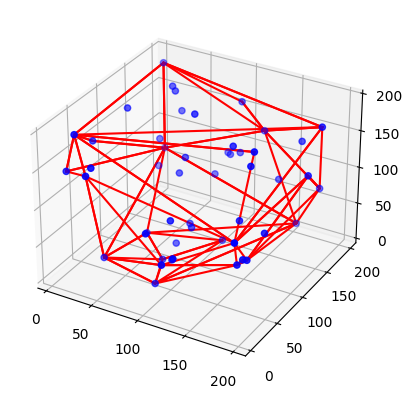

In [72]:
from matplotlib import axis
def plot3D(Par,L):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  x = Par[:,0]
  y = Par[:,1]
  z = Par[:,2]
  ax.scatter(x,y,z,c='b')   
  for s in L.simplices:
      simplices = np.append(s, s[0])
      x = Par[s, 0]
      y = Par[s, 1]
      z = Par[s, 2]
      ax.plot(x,y,z,'r-')

  plt.show()

L = quickhull3d(P)
print("Points of convex hull:")
print(Par[L.vertices])
plot3D(Par,L)